# Tugas
Buatlah sebuah model K-Means dengan ketentuan,
Gunakan data 'Mall_Customers.csv'
Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
Buatlah  implementasi model SOM untuk segmentasi citra lain

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# import dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# melakukan seleksi fitur
X = dataset.iloc[:, [3,4]].values

In [11]:
# menentukan jumlah cluster yang tepat
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

D:\SDK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\SDK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\SDK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\SDK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thre

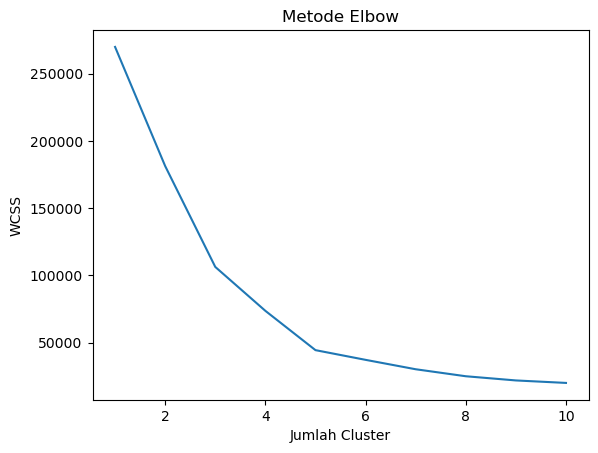

In [12]:
# visualisasi hasil
plt.plot(range(1,11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [13]:
# training model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

D:\SDK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\SDK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


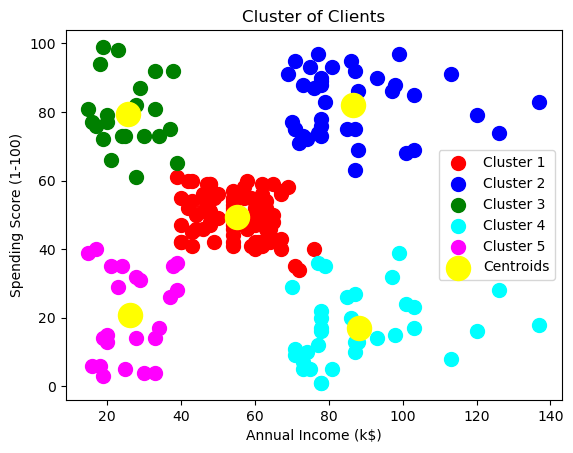

In [17]:
# visualisasi hasil
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [22]:
# implementasi model SOM untuk segmentasi citra lain
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from PIL import Image

In [23]:
# load citra
img = Image.open('Lenna.png')
img = np.array(img, dtype='float')

In [24]:
# normalisasi citra
img = img/255

In [25]:
# mengubah citra menjadi vektor
img = img.reshape(-1,3)

In [26]:
# membuat model SOM
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)
som.random_weights_init(img)

In [27]:
# training model
som.train_random(img, 100)

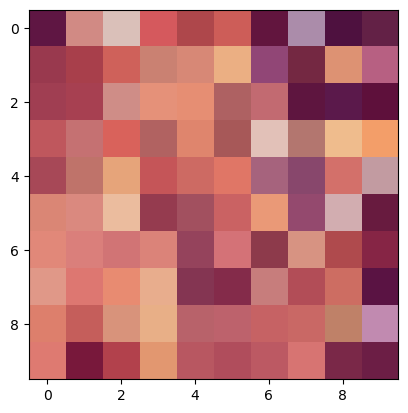

In [28]:
# visualisasi hasil
plt.imshow(som.get_weights())
plt.show()

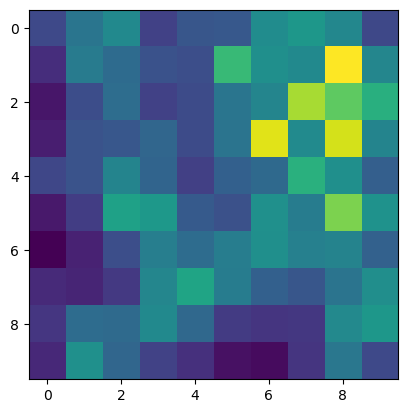

In [29]:
# visualisasi hasil
plt.imshow(som.distance_map())
plt.show()